# Banking Loan Classification - Neural Network - Classification

Dataset has about the home loans of 2,500 bank clients. Each row represents a single loan. The columns include the characteristics of the client who used the loan. This is a binary classification task: predict whether a loan will be bad or not (1=Yes, 0=No). This is an important task for banks to prevent bad loans from being issued.

## Description of Variables

The description of variables are provided in "Loan - Data Dictionary.docx"

## Goal

Use the **loan.csv** data set and build a model to predict **BAD**. Build at least **two neural network models**.<br>

Since we have a relatively small data set, I utilized cross-validation to evaluate the accuracy.

# Read and Prepare the Data
## feature engineering: create one new variable from existing ones

In [1]:
# Insert as many cells as you need for data prep
# Common imports
import numpy as np
import pandas as pd

np.random.seed(42)


In [2]:
loan = pd.read_csv("loan.csv")
loan.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,25900,61064.0,94714.0,DebtCon,Office,2.0,0.0,0.0,98.809375,0.0,23.0,34.565944
1,0,26100,113266.0,182082.0,DebtCon,Sales,18.0,0.0,0.0,304.852469,1.0,31.0,33.193949
2,1,50000,220528.0,300900.0,HomeImp,Self,5.0,0.0,0.0,0.000000,0.0,2.0,NaN
3,1,22400,51470.0,68139.0,DebtCon,Mgr,9.0,0.0,0.0,31.168696,2.0,8.0,37.952180
4,0,20900,62615.0,87904.0,DebtCon,Office,5.0,NaN,NaN,177.864849,NaN,15.0,36.831076


In [3]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(loan, test_size=0.3)

In [4]:
train_set.isna().sum()

BAD          0
LOAN         0
MORTDUE    151
VALUE       61
REASON      89
JOB         74
YOJ        156
DEROG      194
DELINQ     165
CLAGE      105
NINQ       153
CLNO        76
DEBTINC    556
dtype: int64

In [5]:
test_set.isna().sum()

BAD          0
LOAN         0
MORTDUE     71
VALUE       30
REASON      30
JOB         32
YOJ         60
DEROG       76
DELINQ      61
CLAGE       41
NINQ        59
CLNO        29
DEBTINC    262
dtype: int64

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import FunctionTransformer

In [7]:

#train = train_set.drop(['BAD'], axis=1)
#test = test_set.drop(['BAD'], axis=1)

In [8]:
train_y = train_set['BAD']
test_y = test_set['BAD']

train_inputs = train_set.drop(['BAD'], axis=1)
test_inputs = test_set.drop(['BAD'], axis=1)

In [9]:
train_inputs['DEBTINC'].describe()

count    1194.000000
mean       34.234000
std        10.584808
min         0.524499
25%        29.160065
50%        35.029222
75%        39.195746
max       203.312149
Name: DEBTINC, dtype: float64

<AxesSubplot:>

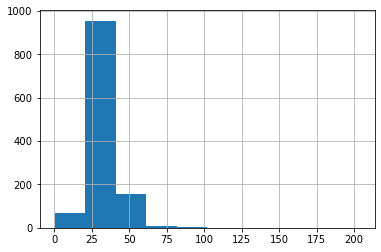

In [10]:
train_inputs['DEBTINC'].hist()

In [11]:
def new_col(df):
    #Create a copy so that we don't overwrite the existing dataframe
    df1 = df.copy()
    
    #df1['POSSIBLELOANDEFAULT'] = np.where(pd.isnull(train_inputs['VALUE'])|,1,0)
    #return df1['POSSIBLELOANDEFAULT']
    #df1['QUANTILEDEBT'] = pd.qcut(train_inputs['DEBTINC'],5, duplicates='drop',
    #                      labels=['1', '2', '3','4','5'])
    df1['POSSIBLELOANDEFAULT'] = np.where(df1['DEBTINC'] >= 50 , 1, 0)

    return df1[['POSSIBLELOANDEFAULT']]
    #df1['QUANTILEDEBT'] = np.where((df1['DEBTINC']).isnull(), '0',df1['QUANTILEDEBT'])
    #df1['QUANTILEDEBT'] =pd.DataFrame(df1['QUANTILEDEBT'],
    #                  index=np.arange(1, 1751, 1), columns=['QUANTILEDEBT'])
    
    #return df1['QUANTILEDEBT']
    

In [12]:
new_col(train_inputs)

,POSSIBLELOANDEFAULT
1552,0
2290,1
1398,0
1775,0
2299,0
...,...
1638,0
1095,0
1130,0
1294,0


### NUMERICAL AND CATEGORICAL COLUMNS

In [13]:
train_inputs.dtypes

LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [14]:
# Identify the numerical columns
numeric_columns = train_inputs.select_dtypes(include=[np.number]).columns.to_list()

# Identify the categorical columns
categorical_columns = train_inputs.select_dtypes('object').columns.to_list()

In [15]:
transformed_columns = ['DEBTINC']

In [16]:
numeric_columns

['LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [17]:
categorical_columns

['REASON', 'JOB']

### PIPELINE

In [18]:
numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [19]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [20]:
##binary_transformer = Pipeline(steps=[
##    ('imputer', SimpleImputer(strategy='most_frequent'))])

In [21]:
my_new_column = Pipeline(steps=[('my_new_column', FunctionTransformer(new_col)),
                               ('imputer', SimpleImputer(strategy='constant')),
                               ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [22]:
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns),
       # ('binary', binary_transformer, binary_columns),
        ('trans', my_new_column, transformed_columns)],
        remainder='passthrough')

In [23]:
#Fit and transform the train data
train_x = preprocessor.fit_transform(train_inputs)

train_x

array([[-0.31412013, -1.30301181, -0.86148829, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.45733454,  0.7398414 ,  0.58636192, ...,  0.        ,
         0.        ,  1.        ],
       [-1.10330939,  0.2001631 ,  0.18146318, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.21657988, -0.83000156, -0.82081329, ...,  0.        ,
         1.        ,  0.        ],
       [-0.46486414,  1.79196675,  1.36974799, ...,  0.        ,
         1.        ,  0.        ],
       [-0.31412013, -0.08740643, -0.21782887, ...,  0.        ,
         1.        ,  0.        ]])

In [24]:
train_x.shape

(1750, 22)

In [25]:
# Transform the test data
test_x = preprocessor.transform(test_inputs)

test_x

array([[ 0.06717356,  0.36706438,  0.32127798, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.32432512,  0.57631513,  0.42769944, ...,  0.        ,
         1.        ,  0.        ],
       [-0.33185472,  0.41209537,  0.12227549, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8993616 , -0.51071616, -0.32326299, ...,  0.        ,
         1.        ,  0.        ],
       [-0.5446698 , -0.82706576, -0.8366813 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.5446698 , -0.06422056, -0.11380525, ...,  0.        ,
         1.        ,  0.        ]])

In [26]:
test_x.shape

(750, 22)

# Baseline:

In [27]:
train_y.value_counts()/len(train_y)

0    0.603429
1    0.396571
Name: BAD, dtype: float64

## Neural Network Model 1

In [28]:
from sklearn.neural_network import MLPClassifier

#Default settings create 1 hidden layer with 100 neurons
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,))

mlp_clf.fit(train_x, train_y)

C:\Users\anush\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

### Accuracy

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
#Predict the train values
train_y_pred = mlp_clf.predict(train_x)

#Train accuracy
accuracy_score(train_y, train_y_pred)

0.904

In [31]:
#Predict the test values
test_y_pred = mlp_clf.predict(test_x)

#Test accuracy
accuracy_score(test_y, test_y_pred)

0.8266666666666667

In [32]:
from sklearn.metrics import confusion_matrix

#We usually create the confusion matrix on test set
confusion_matrix(test_y, test_y_pred)

array([[389,  44],
       [ 86, 231]], dtype=int64)

### Confusion matrix 

In [33]:
from sklearn.metrics import confusion_matrix

#We usually create the confusion matrix on test set
confusion_matrix(test_y, test_y_pred)

array([[389,  44],
       [ 86, 231]], dtype=int64)

## Neural network model with increased number of iterations 

In [86]:
#Default settings create 1 hidden layer with 100 neurons--without alpha -86% and alpha 0.01 86.4
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, verbose=True,activation='relu',alpha=0.05)
                       #learning_rate= 'adaptive', solver= 'adam')

mlp_clf.fit(train_x, train_y)

Iteration 1, loss = 0.65813764
Iteration 2, loss = 0.60860478
Iteration 3, loss = 0.57541424
Iteration 4, loss = 0.55225427
Iteration 5, loss = 0.53481339
Iteration 6, loss = 0.52314222
Iteration 7, loss = 0.51372145
Iteration 8, loss = 0.50672616
Iteration 9, loss = 0.50129945
Iteration 10, loss = 0.49651382
Iteration 11, loss = 0.49273192
Iteration 12, loss = 0.48957257
Iteration 13, loss = 0.48665863
Iteration 14, loss = 0.48413141
Iteration 15, loss = 0.48168363
Iteration 16, loss = 0.47907529
Iteration 17, loss = 0.47696315
Iteration 18, loss = 0.47474654
Iteration 19, loss = 0.47277727
Iteration 20, loss = 0.47097024
Iteration 21, loss = 0.46902391
Iteration 22, loss = 0.46705144
Iteration 23, loss = 0.46547975
Iteration 24, loss = 0.46359646
Iteration 25, loss = 0.46198494
Iteration 26, loss = 0.46030934
Iteration 27, loss = 0.45879779
Iteration 28, loss = 0.45694327
Iteration 29, loss = 0.45555597
Iteration 30, loss = 0.45393775
Iteration 31, loss = 0.45224774
Iteration 32, los

Iteration 253, loss = 0.25135272
Iteration 254, loss = 0.25067364
Iteration 255, loss = 0.25076786
Iteration 256, loss = 0.24917777
Iteration 257, loss = 0.24945153
Iteration 258, loss = 0.24904205
Iteration 259, loss = 0.24787434
Iteration 260, loss = 0.24747099
Iteration 261, loss = 0.24721176
Iteration 262, loss = 0.24609876
Iteration 263, loss = 0.24579120
Iteration 264, loss = 0.24602880
Iteration 265, loss = 0.24454835
Iteration 266, loss = 0.24443059
Iteration 267, loss = 0.24432072
Iteration 268, loss = 0.24361802
Iteration 269, loss = 0.24298441
Iteration 270, loss = 0.24278040
Iteration 271, loss = 0.24211519
Iteration 272, loss = 0.24218271
Iteration 273, loss = 0.24069849
Iteration 274, loss = 0.24079458
Iteration 275, loss = 0.23970749
Iteration 276, loss = 0.23997501
Iteration 277, loss = 0.23876472
Iteration 278, loss = 0.23848632
Iteration 279, loss = 0.23783450
Iteration 280, loss = 0.23734617
Iteration 281, loss = 0.23767429
Iteration 282, loss = 0.23657343
Iteration 

Iteration 518, loss = 0.16609852
Iteration 519, loss = 0.16628323
Iteration 520, loss = 0.16571339
Iteration 521, loss = 0.16526406
Iteration 522, loss = 0.16502328
Iteration 523, loss = 0.16513845
Iteration 524, loss = 0.16624188
Iteration 525, loss = 0.16469720
Iteration 526, loss = 0.16443596
Iteration 527, loss = 0.16387075
Iteration 528, loss = 0.16431061
Iteration 529, loss = 0.16375982
Iteration 530, loss = 0.16352848
Iteration 531, loss = 0.16305653
Iteration 532, loss = 0.16416279
Iteration 533, loss = 0.16449601
Iteration 534, loss = 0.16525431
Iteration 535, loss = 0.16444369
Iteration 536, loss = 0.16342603
Iteration 537, loss = 0.16267822
Iteration 538, loss = 0.16172202
Iteration 539, loss = 0.16217689
Iteration 540, loss = 0.16208042
Iteration 541, loss = 0.16233733
Iteration 542, loss = 0.16116479
Iteration 543, loss = 0.16104727
Iteration 544, loss = 0.16079427
Iteration 545, loss = 0.16050131
Iteration 546, loss = 0.16134209
Iteration 547, loss = 0.16132886
Iteration 

Iteration 780, loss = 0.13276923
Iteration 781, loss = 0.13230056
Iteration 782, loss = 0.13229296
Iteration 783, loss = 0.13229249
Iteration 784, loss = 0.13233042
Iteration 785, loss = 0.13196923
Iteration 786, loss = 0.13195515
Iteration 787, loss = 0.13146119
Iteration 788, loss = 0.13184999
Iteration 789, loss = 0.13202739
Iteration 790, loss = 0.13176551
Iteration 791, loss = 0.13152331
Iteration 792, loss = 0.13117800
Iteration 793, loss = 0.13166595
Iteration 794, loss = 0.13143499
Iteration 795, loss = 0.13150762
Iteration 796, loss = 0.13113641
Iteration 797, loss = 0.13118836
Iteration 798, loss = 0.13152878
Iteration 799, loss = 0.13117805
Iteration 800, loss = 0.13115070
Iteration 801, loss = 0.13103529
Iteration 802, loss = 0.13047462
Iteration 803, loss = 0.13081182
Iteration 804, loss = 0.13088517
Iteration 805, loss = 0.13045137
Iteration 806, loss = 0.13049189
Iteration 807, loss = 0.13111791
Iteration 808, loss = 0.13068147
Iteration 809, loss = 0.13081559
Iteration 

MLPClassifier(alpha=0.05, max_iter=1000, verbose=True)

In [87]:
#Predict the train values
train_y_pred = mlp_clf.predict(train_x)

#Train accuracy
accuracy_score(train_y, train_y_pred)

0.9925714285714285

In [88]:
#Predict the test values
test_y_pred = mlp_clf.predict(test_x)

#Test accuracy
accuracy_score(test_y, test_y_pred)

0.8653333333333333

## Neural Network model with reduced nuerons 

In [37]:
#Increase neurons from 100 to 50
mlp_clf3 = MLPClassifier(max_iter=1000, verbose=False,
                        hidden_layer_sizes=(50,),alpha=0.01,activation='relu'
                      )

mlp_clf3.fit(train_x, train_y)

C:\Users\anush\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, hidden_layer_sizes=(50,), max_iter=1000)

In [38]:
#Predict the train values
train_y_pred = mlp_clf3.predict(train_x)

#Train accuracy
accuracy_score(train_y, train_y_pred)

0.968

In [39]:
#Predict the test values
test_y_pred = mlp_clf3.predict(test_x)

#Test accuracy
accuracy_score(test_y, test_y_pred)

0.8573333333333333

## Deep Neural Network

In [40]:
dnn_clf = MLPClassifier(hidden_layer_sizes=(50,25,10),
                       max_iter=1000,alpha=0.01,activation='relu')

dnn_clf.fit(train_x, train_y)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(50, 25, 10), max_iter=1000)

In [41]:
#Let's check the number of iterations:
dnn_clf.n_iter_

308

In [42]:
#Let's check the number of layers:
dnn_clf.n_layers_

5

In [43]:
#Predict the train values
train_y_pred = dnn_clf.predict(train_x)

#Train accuracy
accuracy_score(train_y, train_y_pred)

0.9988571428571429

In [44]:
#Predict the test values
test_y_pred = dnn_clf.predict(test_x)

#Test accuracy
accuracy_score(test_y, test_y_pred)

0.8386666666666667

In [45]:
dnn_clf = MLPClassifier(hidden_layer_sizes=(100,80,60,40,20,10),
                       max_iter=1000,alpha=0.01,activation='relu')

dnn_clf.fit(train_x, train_y)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, 80, 60, 40, 20, 10),
              max_iter=1000)

In [46]:
#Let's check the number of iterations:
dnn_clf.n_iter_

91

In [47]:
#Let's check the number of layers:
dnn_clf.n_layers_

8

In [48]:
#Predict the train values
train_y_pred = dnn_clf.predict(train_x)

#Train accuracy
accuracy_score(train_y, train_y_pred)

1.0

In [49]:
#Predict the test values
test_y_pred = dnn_clf.predict(test_x)

#Test accuracy
accuracy_score(test_y, test_y_pred)

0.856

## Neural Network with Early stopping

In [50]:
dnn_clf = MLPClassifier(hidden_layer_sizes=(50,25,10),
                       max_iter=1000,
                       early_stopping=True,alpha=0.01,activation='relu')

dnn_clf.fit(train_x, train_y)

MLPClassifier(alpha=0.01, early_stopping=True, hidden_layer_sizes=(50, 25, 10),
              max_iter=1000)

In [51]:
#Let's check the number of iterations:
dnn_clf.n_iter_

26

In [52]:
#Predict the train values
train_y_pred = dnn_clf.predict(train_x)

#Train accuracy
accuracy_score(train_y, train_y_pred)

0.7828571428571428

In [53]:
#Predict the test values
test_y_pred = dnn_clf.predict(test_x)

#Test accuracy
accuracy_score(test_y, test_y_pred)

0.7573333333333333

## Neural Network model using Activation function and solver

In [54]:
dnn_clf = MLPClassifier(hidden_layer_sizes=(100,80,60,40,20,10),
                       max_iter=1000,
                       activation = 'relu',
                       solver='lbfgs',alpha=0.01)
##85% sgd solver
dnn_clf.fit(train_x, train_y)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, 80, 60, 40, 20, 10),
              max_iter=1000, solver='lbfgs')

In [55]:
#Predict the train values
train_y_pred = dnn_clf.predict(train_x)

#Train accuracy
accuracy_score(train_y, train_y_pred)

1.0

In [56]:
#Predict the test values
test_y_pred = dnn_clf.predict(test_x)

#Test accuracy
accuracy_score(test_y, test_y_pred)

0.8653333333333333

## Neural Network Model using Randomized Grid Search

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
parameters = {'solver': ['sgd','adam','lbfgs'], 'max_iter': [1000], 'alpha': [0.0001,0.05],
              'hidden_layer_sizes': [100],'activation':['identity', 'logistic', 'relu', 'softmax', 'tanh'],
             'learning_rate':['adaptive'], 'solver':['adam']}
clfrandom = RandomizedSearchCV(MLPClassifier(verbose=True), parameters, n_jobs=-1,cv=5)


In [59]:
clfrandom.fit(train_x, train_y)

C:\Users\anush\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.73942857 0.74114286 0.78685714 0.75371429 0.83542857 0.84685714
        nan        nan 0.84342857 0.84114286]
  warnings.warn(


Iteration 1, loss = 0.68360439
Iteration 2, loss = 0.63319173
Iteration 3, loss = 0.59933024
Iteration 4, loss = 0.57440591
Iteration 5, loss = 0.55506499
Iteration 6, loss = 0.54099453
Iteration 7, loss = 0.52996438
Iteration 8, loss = 0.52146205
Iteration 9, loss = 0.51451499
Iteration 10, loss = 0.50885699
Iteration 11, loss = 0.50445533
Iteration 12, loss = 0.50036738
Iteration 13, loss = 0.49721673
Iteration 14, loss = 0.49403073
Iteration 15, loss = 0.49149321
Iteration 16, loss = 0.48892101
Iteration 17, loss = 0.48677384
Iteration 18, loss = 0.48455043
Iteration 19, loss = 0.48254065
Iteration 20, loss = 0.48053190
Iteration 21, loss = 0.47879134
Iteration 22, loss = 0.47706246
Iteration 23, loss = 0.47532500
Iteration 24, loss = 0.47374760
Iteration 25, loss = 0.47184332
Iteration 26, loss = 0.47020779
Iteration 27, loss = 0.46894571
Iteration 28, loss = 0.46733294
Iteration 29, loss = 0.46579462
Iteration 30, loss = 0.46469352
Iteration 31, loss = 0.46300756
Iteration 32, los

Iteration 258, loss = 0.26043433
Iteration 259, loss = 0.26001352
Iteration 260, loss = 0.25823579
Iteration 261, loss = 0.25817931
Iteration 262, loss = 0.25784329
Iteration 263, loss = 0.25699750
Iteration 264, loss = 0.25667402
Iteration 265, loss = 0.25552268
Iteration 266, loss = 0.25553309
Iteration 267, loss = 0.25547068
Iteration 268, loss = 0.25466522
Iteration 269, loss = 0.25456959
Iteration 270, loss = 0.25376184
Iteration 271, loss = 0.25205747
Iteration 272, loss = 0.25242042
Iteration 273, loss = 0.25171169
Iteration 274, loss = 0.25041253
Iteration 275, loss = 0.25049837
Iteration 276, loss = 0.24969025
Iteration 277, loss = 0.24927458
Iteration 278, loss = 0.24875486
Iteration 279, loss = 0.24869292
Iteration 280, loss = 0.24843327
Iteration 281, loss = 0.24750746
Iteration 282, loss = 0.24690788
Iteration 283, loss = 0.24610383
Iteration 284, loss = 0.24592314
Iteration 285, loss = 0.24513738
Iteration 286, loss = 0.24476288
Iteration 287, loss = 0.24438660
Iteration 

Iteration 515, loss = 0.17108860
Iteration 516, loss = 0.17050783
Iteration 517, loss = 0.17024868
Iteration 518, loss = 0.16971537
Iteration 519, loss = 0.16963223
Iteration 520, loss = 0.16964569
Iteration 521, loss = 0.16954004
Iteration 522, loss = 0.16920702
Iteration 523, loss = 0.16886797
Iteration 524, loss = 0.16875704
Iteration 525, loss = 0.16901708
Iteration 526, loss = 0.16845451
Iteration 527, loss = 0.16842324
Iteration 528, loss = 0.16828293
Iteration 529, loss = 0.16767635
Iteration 530, loss = 0.16798150
Iteration 531, loss = 0.16758177
Iteration 532, loss = 0.16754076
Iteration 533, loss = 0.16714789
Iteration 534, loss = 0.16686870
Iteration 535, loss = 0.16725435
Iteration 536, loss = 0.16741737
Iteration 537, loss = 0.16746099
Iteration 538, loss = 0.16791940
Iteration 539, loss = 0.16775177
Iteration 540, loss = 0.16684639
Iteration 541, loss = 0.16567776
Iteration 542, loss = 0.16572843
Iteration 543, loss = 0.16561165
Iteration 544, loss = 0.16685420
Iteration 

Iteration 766, loss = 0.13615521
Iteration 767, loss = 0.13565119
Iteration 768, loss = 0.13617004
Iteration 769, loss = 0.13609077
Iteration 770, loss = 0.13596570
Iteration 771, loss = 0.13558387
Iteration 772, loss = 0.13598623
Iteration 773, loss = 0.13563824
Iteration 774, loss = 0.13525923
Iteration 775, loss = 0.13496129
Iteration 776, loss = 0.13530654
Iteration 777, loss = 0.13502543
Iteration 778, loss = 0.13603499
Iteration 779, loss = 0.13557997
Iteration 780, loss = 0.13460777
Iteration 781, loss = 0.13547056
Iteration 782, loss = 0.13519143
Iteration 783, loss = 0.13546490
Iteration 784, loss = 0.13508174
Iteration 785, loss = 0.13507319
Iteration 786, loss = 0.13613370
Iteration 787, loss = 0.13576339
Iteration 788, loss = 0.13432683
Iteration 789, loss = 0.13456171
Iteration 790, loss = 0.13520538
Iteration 791, loss = 0.13415217
Iteration 792, loss = 0.13432208
Iteration 793, loss = 0.13436791
Iteration 794, loss = 0.13458851
Iteration 795, loss = 0.13380980
Iteration 

RandomizedSearchCV(cv=5, estimator=MLPClassifier(verbose=True), n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'relu', 'softmax',
                                                       'tanh'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [100],
                                        'learning_rate': ['adaptive'],
                                        'max_iter': [1000],
                                        'solver': ['adam']})

In [60]:
clfrandom.best_params_

{'solver': 'adam',
 'max_iter': 1000,
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': 100,
 'alpha': 0.05,
 'activation': 'relu'}

In [61]:
clfrandom.best_estimator_

MLPClassifier(alpha=0.05, hidden_layer_sizes=100, learning_rate='adaptive',
              max_iter=1000, verbose=True)

In [62]:
cvres = clfrandom.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.7394285714285715 {'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 100, 'alpha': 0.0001, 'activation': 'identity'}
0.7411428571428571 {'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 100, 'alpha': 0.05, 'activation': 'identity'}
0.7868571428571428 {'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 100, 'alpha': 0.0001, 'activation': 'logistic'}
0.7537142857142857 {'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 100, 'alpha': 0.05, 'activation': 'logistic'}
0.8354285714285714 {'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 100, 'alpha': 0.0001, 'activation': 'relu'}
0.846857142857143 {'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 100, 'alpha': 0.05, 'activation': 'relu'}
nan {'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'adaptive', 'hidden_layer_s

In [63]:
train_y_pred = clfrandom.best_estimator_.predict(train_x)

print(accuracy_score(train_y, train_y_pred))

0.9897142857142858


In [64]:
test_y_pred = clfrandom.best_estimator_.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.864


## Neural Network using Grid Search

In [65]:
mlp_gs = MLPClassifier(max_iter=1000)
parameter_space = {
    'hidden_layer_sizes': [(100,80,60,40,20,10),(20,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)

In [66]:
clf.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(100, 80, 60, 40, 20, 10),
                                                (20, 10)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [67]:
cvres = clf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8211428571428572 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 80, 60, 40, 20, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
0.8245714285714285 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 80, 60, 40, 20, 10), 'learning_rate': 'constant', 'solver': 'adam'}
0.8251428571428571 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 80, 60, 40, 20, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.8274285714285714 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 80, 60, 40, 20, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.7514285714285714 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
0.8119999999999999 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 10), 'learning_rate': 'constant', 'solver': 'adam'}
0.756 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 10), 'learning_rate': 'adaptive', 

In [68]:
train_y_pred = clf.best_estimator_.predict(train_x)

print(accuracy_score(train_y, train_y_pred))

0.992


In [69]:
test_y_pred = clf.best_estimator_.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.856


# Discussion


1) Which model performs the best (and why)?<br>
2) What is the baseline value?<br>
3) Does the best model perform better than the baseline (and why)?<br>
4) Does the best model exhibit any overfitting; what did you do about it?

## Extra Credit

In [70]:
import pandas as pd
import numpy as np
loan_competition = pd.read_csv("loan-competition.csv")
loan_competition=loan_competition.drop(['id'],axis=1)

In [71]:
def new_col(df):
    #Create a copy so that we don't overwrite the existing dataframe
    df1 = df.copy()
    
    #df1['QUANTILEDEBT'] = pd.qcut(train_inputs['DEBTINC'],5, duplicates='drop',
     #                   labels=['1', '2', '3','4','5'])
    
    df1['POSSIBLELOANDEFAULT'] = np.where(df1['DEBTINC'] >= 50, 1, 0)

    return np.where(df1[['POSSIBLELOANDEFAULT']]==1)

In [72]:
new_col(loan_competition)

(array([150, 162, 272, 279, 315, 382], dtype=int64),
 array([0, 0, 0, 0, 0, 0], dtype=int64))

In [73]:
loan_competition.dtypes

LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [74]:
# Identify the numerical columns
numeric_columns = loan_competition.select_dtypes(include=[np.number]).columns.to_list()

# Identify the categorical columns
categorical_columns = loan_competition.select_dtypes('object').columns.to_list()

In [75]:
numeric_columns

['LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [76]:
categorical_columns

['REASON', 'JOB']

In [77]:
transformed_columns = ['DEBTINC']

In [78]:
testLoan = preprocessor.transform(loan_competition)

testLoan

array([[-0.49146603, -0.06884386, -0.23546   , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.78542446,  1.69034653,  1.38824304, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16471381,  0.74485769,  0.71485755, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.9006993 ,  1.27519692,  1.18908187, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12790693, -0.18844874, -1.23361078, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.47506913,  0.42420842,  0.74809222, ...,  0.        ,
         1.        ,  0.        ]])

In [79]:
bestprediction = dnn_clf.predict(testLoan)

In [80]:
bestpredictiondf=pd.DataFrame(bestprediction,columns=['BAD'])

In [83]:
bestpredictiondf.insert(1, "ID", np.arange(1, 407, 1).tolist(), False)

In [84]:
bestpredictiondf.head()


,BAD,ID
0,1,1
1,0,2
2,1,3
3,0,4
4,0,5


In [85]:
bestpredictiondf.to_csv('salian_tm_competition.csv',index=False)